# Data analysis for different deploy and remove probabilities
Three main variations of the algorithm are explored:


1) const: it's the original algorithm where pDeploy is constant up to a thrashold of maxBeaconNumber


2) exp: in this case pDeploy takes the form of $ pDeploy(beaconsNumber) = \exp(- \frac{beaconsNumber}{maxBeaconNumber})$


3) expAndRem: pDeploy is the same as case 2 but a new pRemove is used.Beacons are always removed is they met the conditions posed in the article, plus they are removed even if said conditions aren't met with probability $ pRemove(locality) = 1-(\frac{\tau - locality}{\tau})^{0.2}$ with $\tau = 80$. Locality is defined as the time spent without changing the beacon chosen as a better candidate inside canRemove(it is a measure of how much an agent is stuck inside this best candidate are of influence). Such a forced removal allows to escape from  local maxima that spawn from the separation of a part of beacons's network from the rest.


To assess the performances of this variations, various simulations are performed and the average of the data is studied. More simulations are performed for small values of maxBeaconNumber as the algorithm performes less reliably.(the right number of simulations executed is shown below)

In [2]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

In [3]:
diffMaxBeacons = pd.read_csv('../data/diffMaxBeacons.csv.bz2')
#the unused parametr beaconTimescale was set at different constant values to distinguish the 3 variations, 
#here it is swapped with a proper label
types = {15000000:'exp', 150:'const',100:'expAndRem'}
diffMaxBeacons['type'] = diffMaxBeacons['beaconTimescale'].map(lambda x : types[x])
diffMaxBeacons.drop(columns='beaconTimescale',inplace=True)


In [4]:
# This code displays the number of simulations for each type of simulation included in the data analysis.
# The seed column stands for the count of different seeds, hence the number of simulations.
diffMaxBeacons.loc[:,['type','seed','maxBeaconNumber']].drop_duplicates().groupby(['type','maxBeaconNumber']).count()

seed
type      maxBeaconNumber      
const     30                 12
          50                 12
          70                 12
          100                24
          200                12
          500                12
          1000               12
exp       30                 24
          50                 24
          70                 24
          100                24
          200                12
          500                12
          1000               12
expAndRem 30                 24
          50                 24
          70                 24
          100                24
          200                12
          500                12
          1000               12

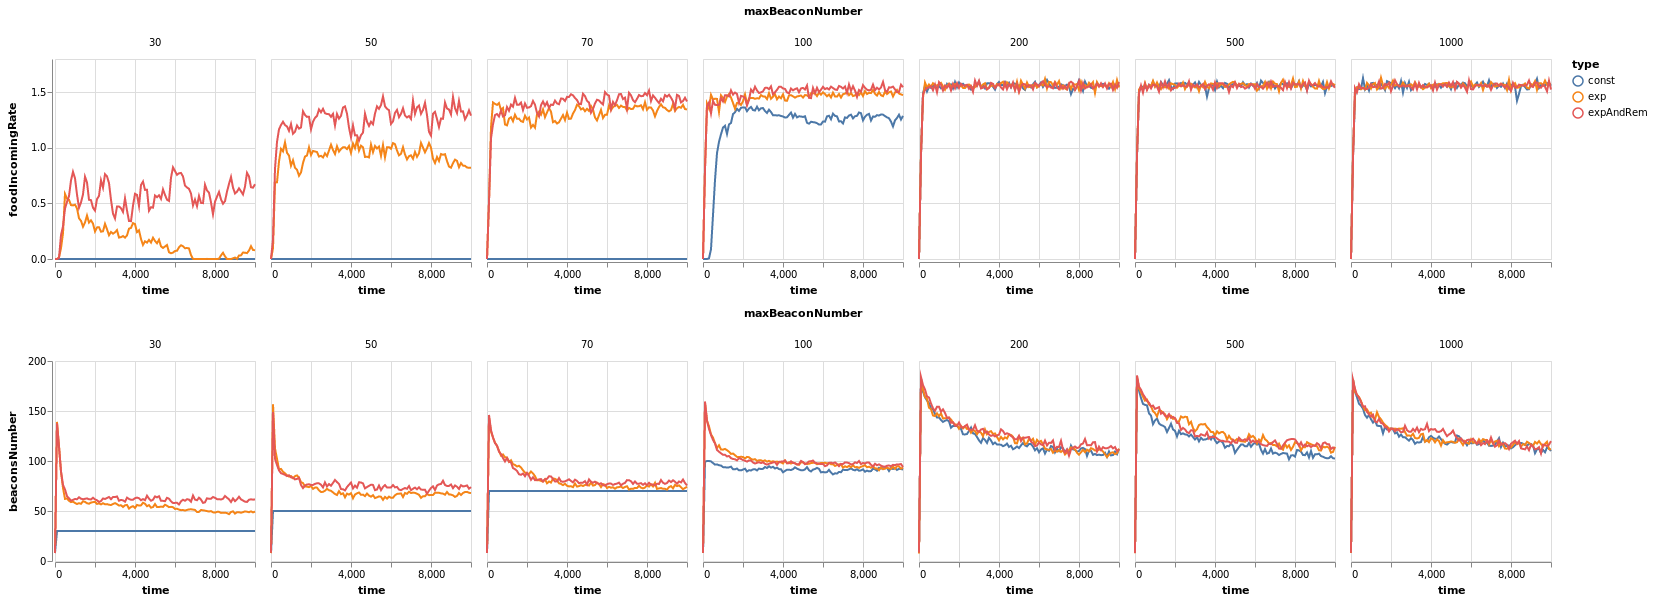

In [5]:
meanedDiff = diffMaxBeacons.groupby(['time','maxBeaconNumber','type']).mean().reset_index()
alt.Chart(meanedDiff).mark_line().properties(
    height=200,
    width =200).encode(
    x='time',
    y=alt.Y(alt.repeat("row"),type='quantitative'),
    color = 'type'
    ).facet(
    column='maxBeaconNumber').repeat( row=['foodIncomingRate','beaconsNumber'])

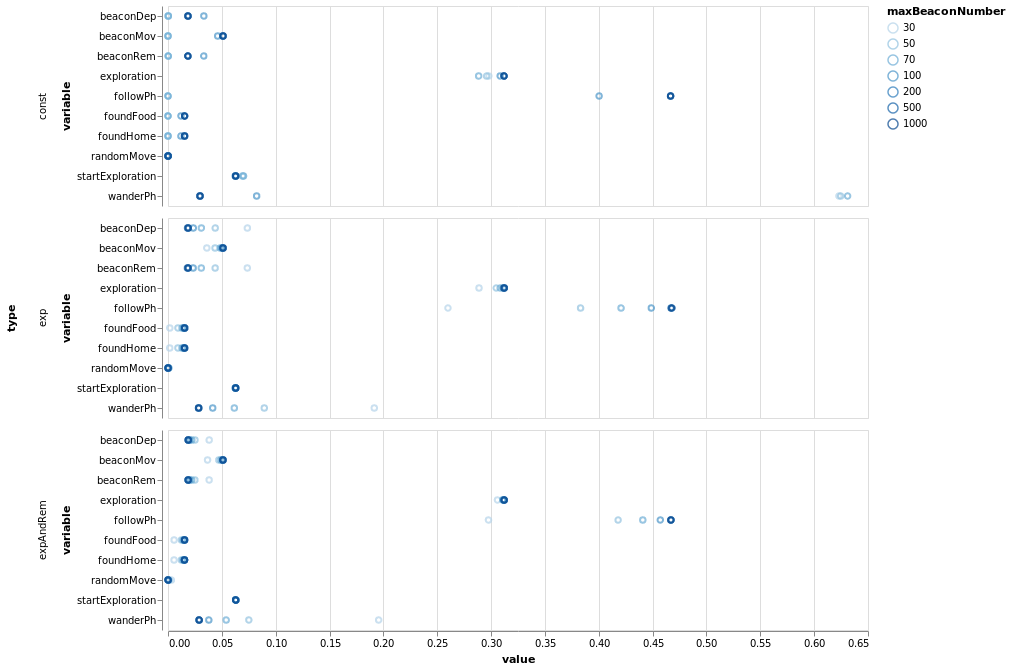

In [40]:
probabilities = alt.Chart(diffMaxBeacons.iloc[:,[0,-1]+list(range(6,16))].groupby(['maxBeaconNumber','type']).mean().reset_index().melt(['type','maxBeaconNumber']))

probabilities.mark_point().encode(
    x='value',
    y='variable',
    color = 'maxBeaconNumber:O').properties(
    width=700,
    height=200).facet(
    row='type')


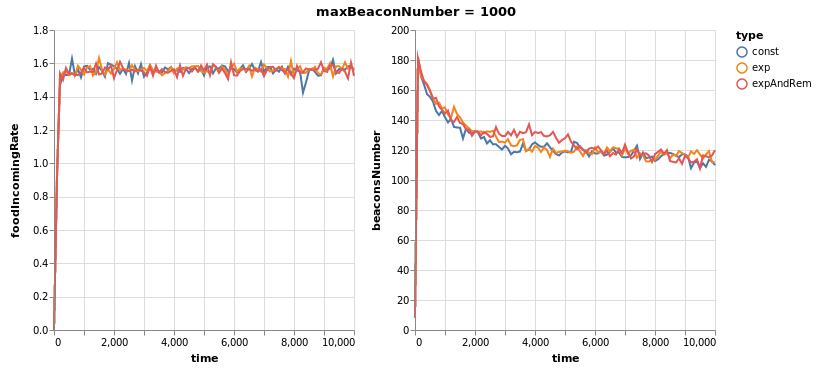

In [53]:
ch1 = alt.Chart(meanedDiff[meanedDiff.maxBeaconNumber == 1000])
gr1=ch1.mark_line().encode(
    x='time',
    y='foodIncomingRate',
    color = 'type:N'
    ).properties(
    height=300,
    width=300)
gr2 =ch1.mark_line().encode(
    x='time',
    y='beaconsNumber',
    color='type:N').properties(
    height=300,
    width=300)
alt.hconcat(gr1,gr2,title={'text':"                                                              maxBeaconNumber = 1000",'anchor':'middle'})

In [2]:
meaned = df.groupby(['beaconTimescale','time']).mean().reset_index().iloc[:,[0,1,3,4,6]]
meaned.shape

(909, 5)

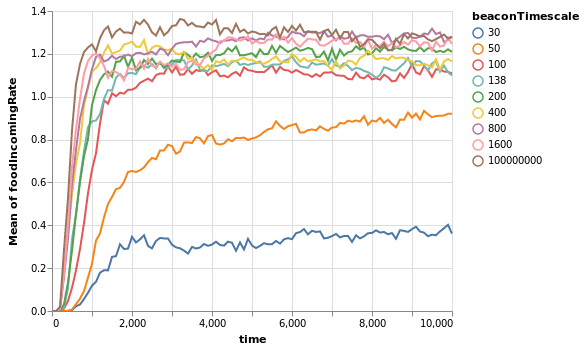

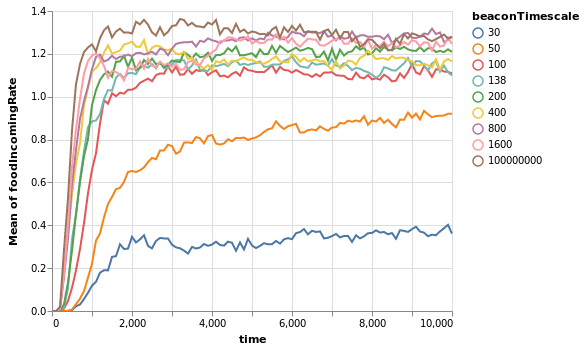

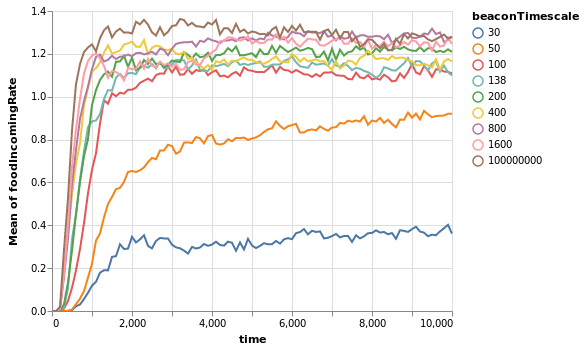

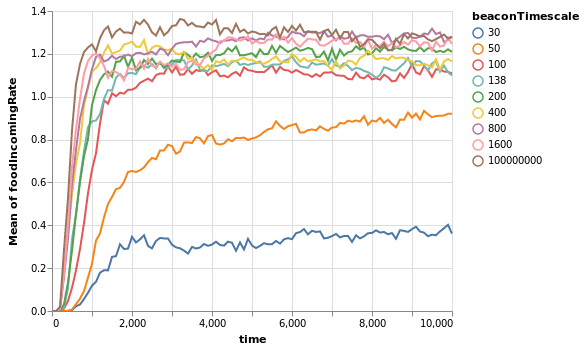

In [3]:
alt.Chart(meaned).mark_line().encode(
    x='time',
    y='mean(foodIncomingRate)',
    color='beaconTimescale:N')

In [4]:
 df1 = df[['beaconTimescale','foundFood', 'foundHome', 'beaconRem', 'exploration', 'startExploration','beaconMov', 'followPh', 'beaconDep', 'wanderPh', 'randomMove']]

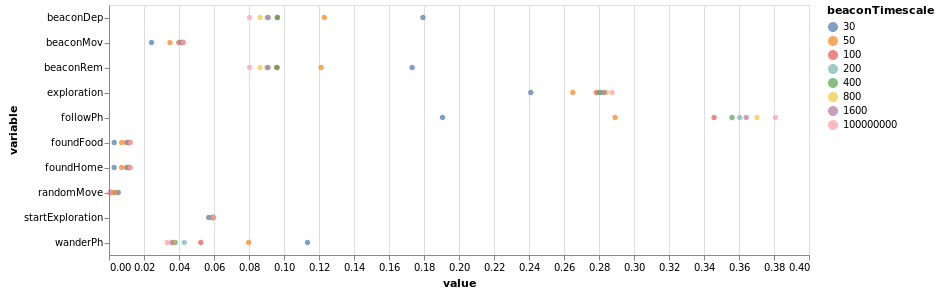

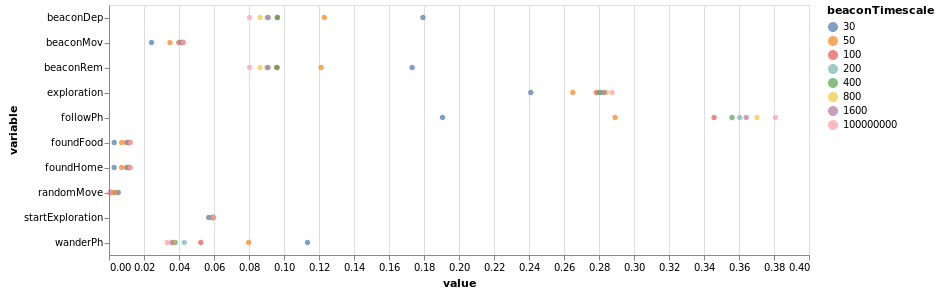

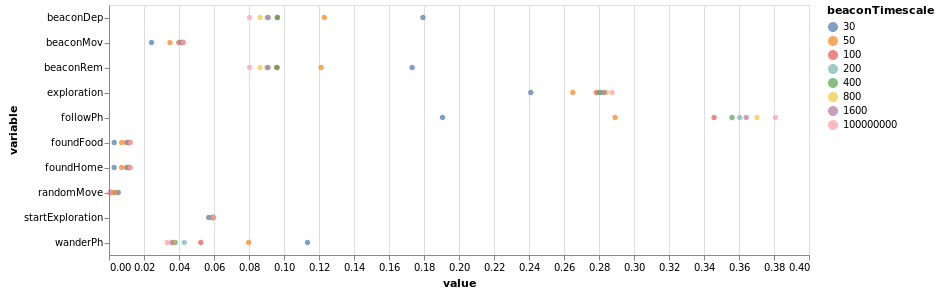

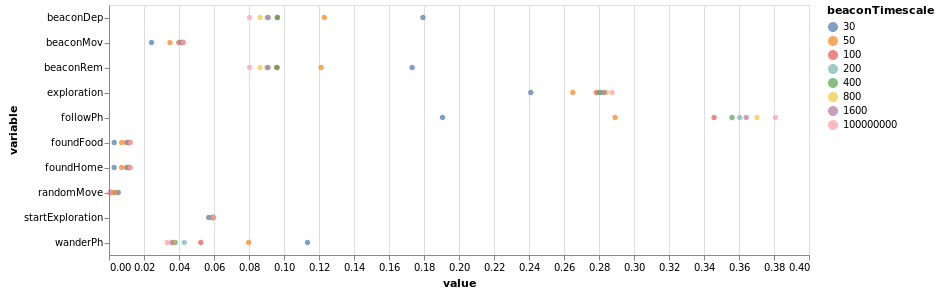

In [13]:

df2 = df1.groupby(['beaconTimescale']).mean().reset_index().melt(['beaconTimescale'])
df2 =df2[df2.beaconTimescale != 138]
c1 = alt.Chart(df2).mark_circle().encode(
    y = 'variable',
    x = 'value',
    color = 'beaconTimescale:N').properties(
    height=250,
    width=700)


df3 = df[['foodIncomingRate','foundFood', 'foundHome', 'beaconRem', 'exploration', 'startExploration','beaconMov', 'followPh', 'beaconDep', 'wanderPh', 'randomMove']]
c2 = alt.Chart(df3.groupby('foodIncomingRate').mean().reset_index().melt('foodIncomingRate')).mark_point().encode(
    x = 'variable',
    y = 'value',
    color = 'foodIncomingRate').configure_legend(gradientStrokeColor='0x00ff00',gradientWidth=40)
c1


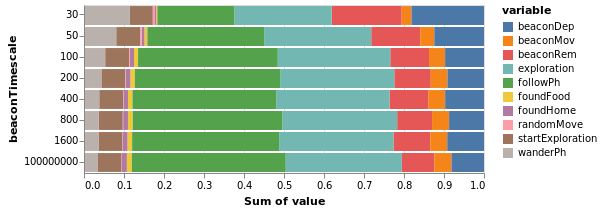

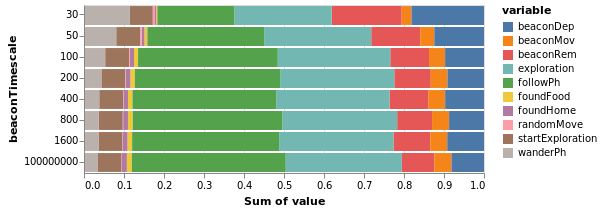

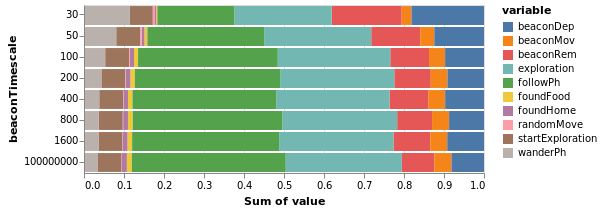

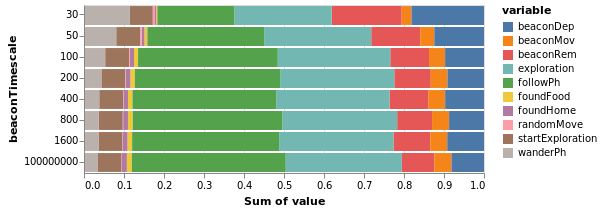

In [18]:
alt.Chart(df2).mark_bar().encode(
    x=alt.X('sum(value)', stack="normalize"),
    y='beaconTimescale:N',
    color='variable'
)